In [1]:
from nowcasting_dataset.data_sources import NWPDataSource
from pathlib import Path
import pandas as pd
import dask

In [13]:
BUCKET = Path('solar-pv-nowcasting-data')
#NWP_BASE_PATH = BUCKET / 'NWP/UK_Met_Office/UKV_zarr'
#NWP_BASE_PATH = BUCKET / 'NWP/UK_Met_Office/UKV_single_step_and_single_timestep_all_vars.zarr'
NWP_BASE_PATH = BUCKET / 'NWP/UK_Met_Office/UKV_single_step_and_single_timestep_all_vars_2018_7-12_TEST.zarr'

In [14]:
nwp_ds = NWPDataSource(
    filename=f'gs://{NWP_BASE_PATH}',
    history_len=0,
    forecast_len=1,
    image_size_pixels=2,
    meters_per_pixel=2_000)

In [15]:
%%time
ds = nwp_ds._open_data()

CPU times: user 46.2 ms, sys: 1.29 ms, total: 47.5 ms
Wall time: 237 ms


In [16]:
ds

,Array,Chunk
Bytes,1.33 GiB,0.92 MiB
Shape,"(10, 10, 37, 704, 548)","(10, 1, 1, 352, 274)"
Count,1481 Tasks,1480 Chunks
Type,uint8,numpy.ndarray


In [7]:
nwp_ds.open()

In [8]:
nwp_ds.data #.astype(np.float16)

,Array,Chunk
Bytes,1.06 GiB,3.68 MiB
Shape,"(10, 2, 37, 704, 548)","(10, 1, 1, 352, 274)"
Count,891 Tasks,296 Chunks
Type,float32,numpy.ndarray


In [6]:
%%time
datetimes = nwp_ds.datetime_index()

CPU times: user 8.93 ms, sys: 4.13 ms, total: 13.1 ms
Wall time: 15.6 ms


In [7]:
datetimes

DatetimeIndex(['2018-07-01 00:00:00', '2018-07-01 00:05:00',
               '2018-07-01 00:10:00', '2018-07-01 00:15:00',
               '2018-07-01 00:20:00', '2018-07-01 00:25:00',
               '2018-07-01 00:30:00', '2018-07-01 00:35:00',
               '2018-07-01 00:40:00', '2018-07-01 00:45:00',
               ...
               '2018-07-02 04:15:00', '2018-07-02 04:20:00',
               '2018-07-02 04:25:00', '2018-07-02 04:30:00',
               '2018-07-02 04:35:00', '2018-07-02 04:40:00',
               '2018-07-02 04:45:00', '2018-07-02 04:50:00',
               '2018-07-02 04:55:00', '2018-07-02 05:00:00'],
              dtype='datetime64[ns]', length=349, freq='5T')

In [8]:
nwp_ds._cache = {}

In [9]:
import numpy as np

In [45]:
random_dt = np.random.choice(datetimes, size=4)

In [46]:
random_dt = np.tile(random_dt, reps=4)

In [47]:
random_dt = pd.DatetimeIndex(random_dt)

In [48]:
loc_x, loc_y = nwp_ds.get_locations_for_batch(random_dt)

In [50]:
%%time
batch = nwp_ds.get_batch(random_dt, loc_x, loc_y)

CPU times: user 1.23 s, sys: 54.4 ms, total: 1.28 s
Wall time: 1.25 s


In [39]:
batch

[{'nwp': array([[[[-9.5365868e+01, -9.5365868e+01],
           [-9.5462723e+01, -9.5365868e+01]],
  
          [[-9.5333588e+01, -9.5333588e+01],
           [-9.5462723e+01, -9.5333588e+01]]],
  
  
         [[[ 2.7000067e-01,  2.7000067e-01],
           [ 1.0042218e-01,  2.1549329e-01]],
  
          [[ 4.5572948e-01,  4.7187981e-01],
           [ 2.4577516e-01,  3.9920333e-01]]],
  
  
         [[[-2.4549781e-01, -2.4549781e-01],
           [-2.4549781e-01, -2.4549781e-01]],
  
          [[-2.4549781e-01, -2.4549781e-01],
           [-2.4549781e-01, -2.4549781e-01]]],
  
  
         [[[-2.1252503e+00, -2.0702856e+00],
           [-1.8779088e+00, -1.8779088e+00]],
  
          [[-2.1069288e+00, -2.0336425e+00],
           [-1.8870697e+00, -1.8870697e+00]]],
  
  
         [[[-5.0482936e-02, -5.0482936e-02],
           [-5.0482936e-02, -5.0482936e-02]],
  
          [[-5.0482936e-02, -5.0482936e-02],
           [-5.0482936e-02, -5.0482936e-02]]],
  
  
         [[[-1.5720272e+00, -1.74

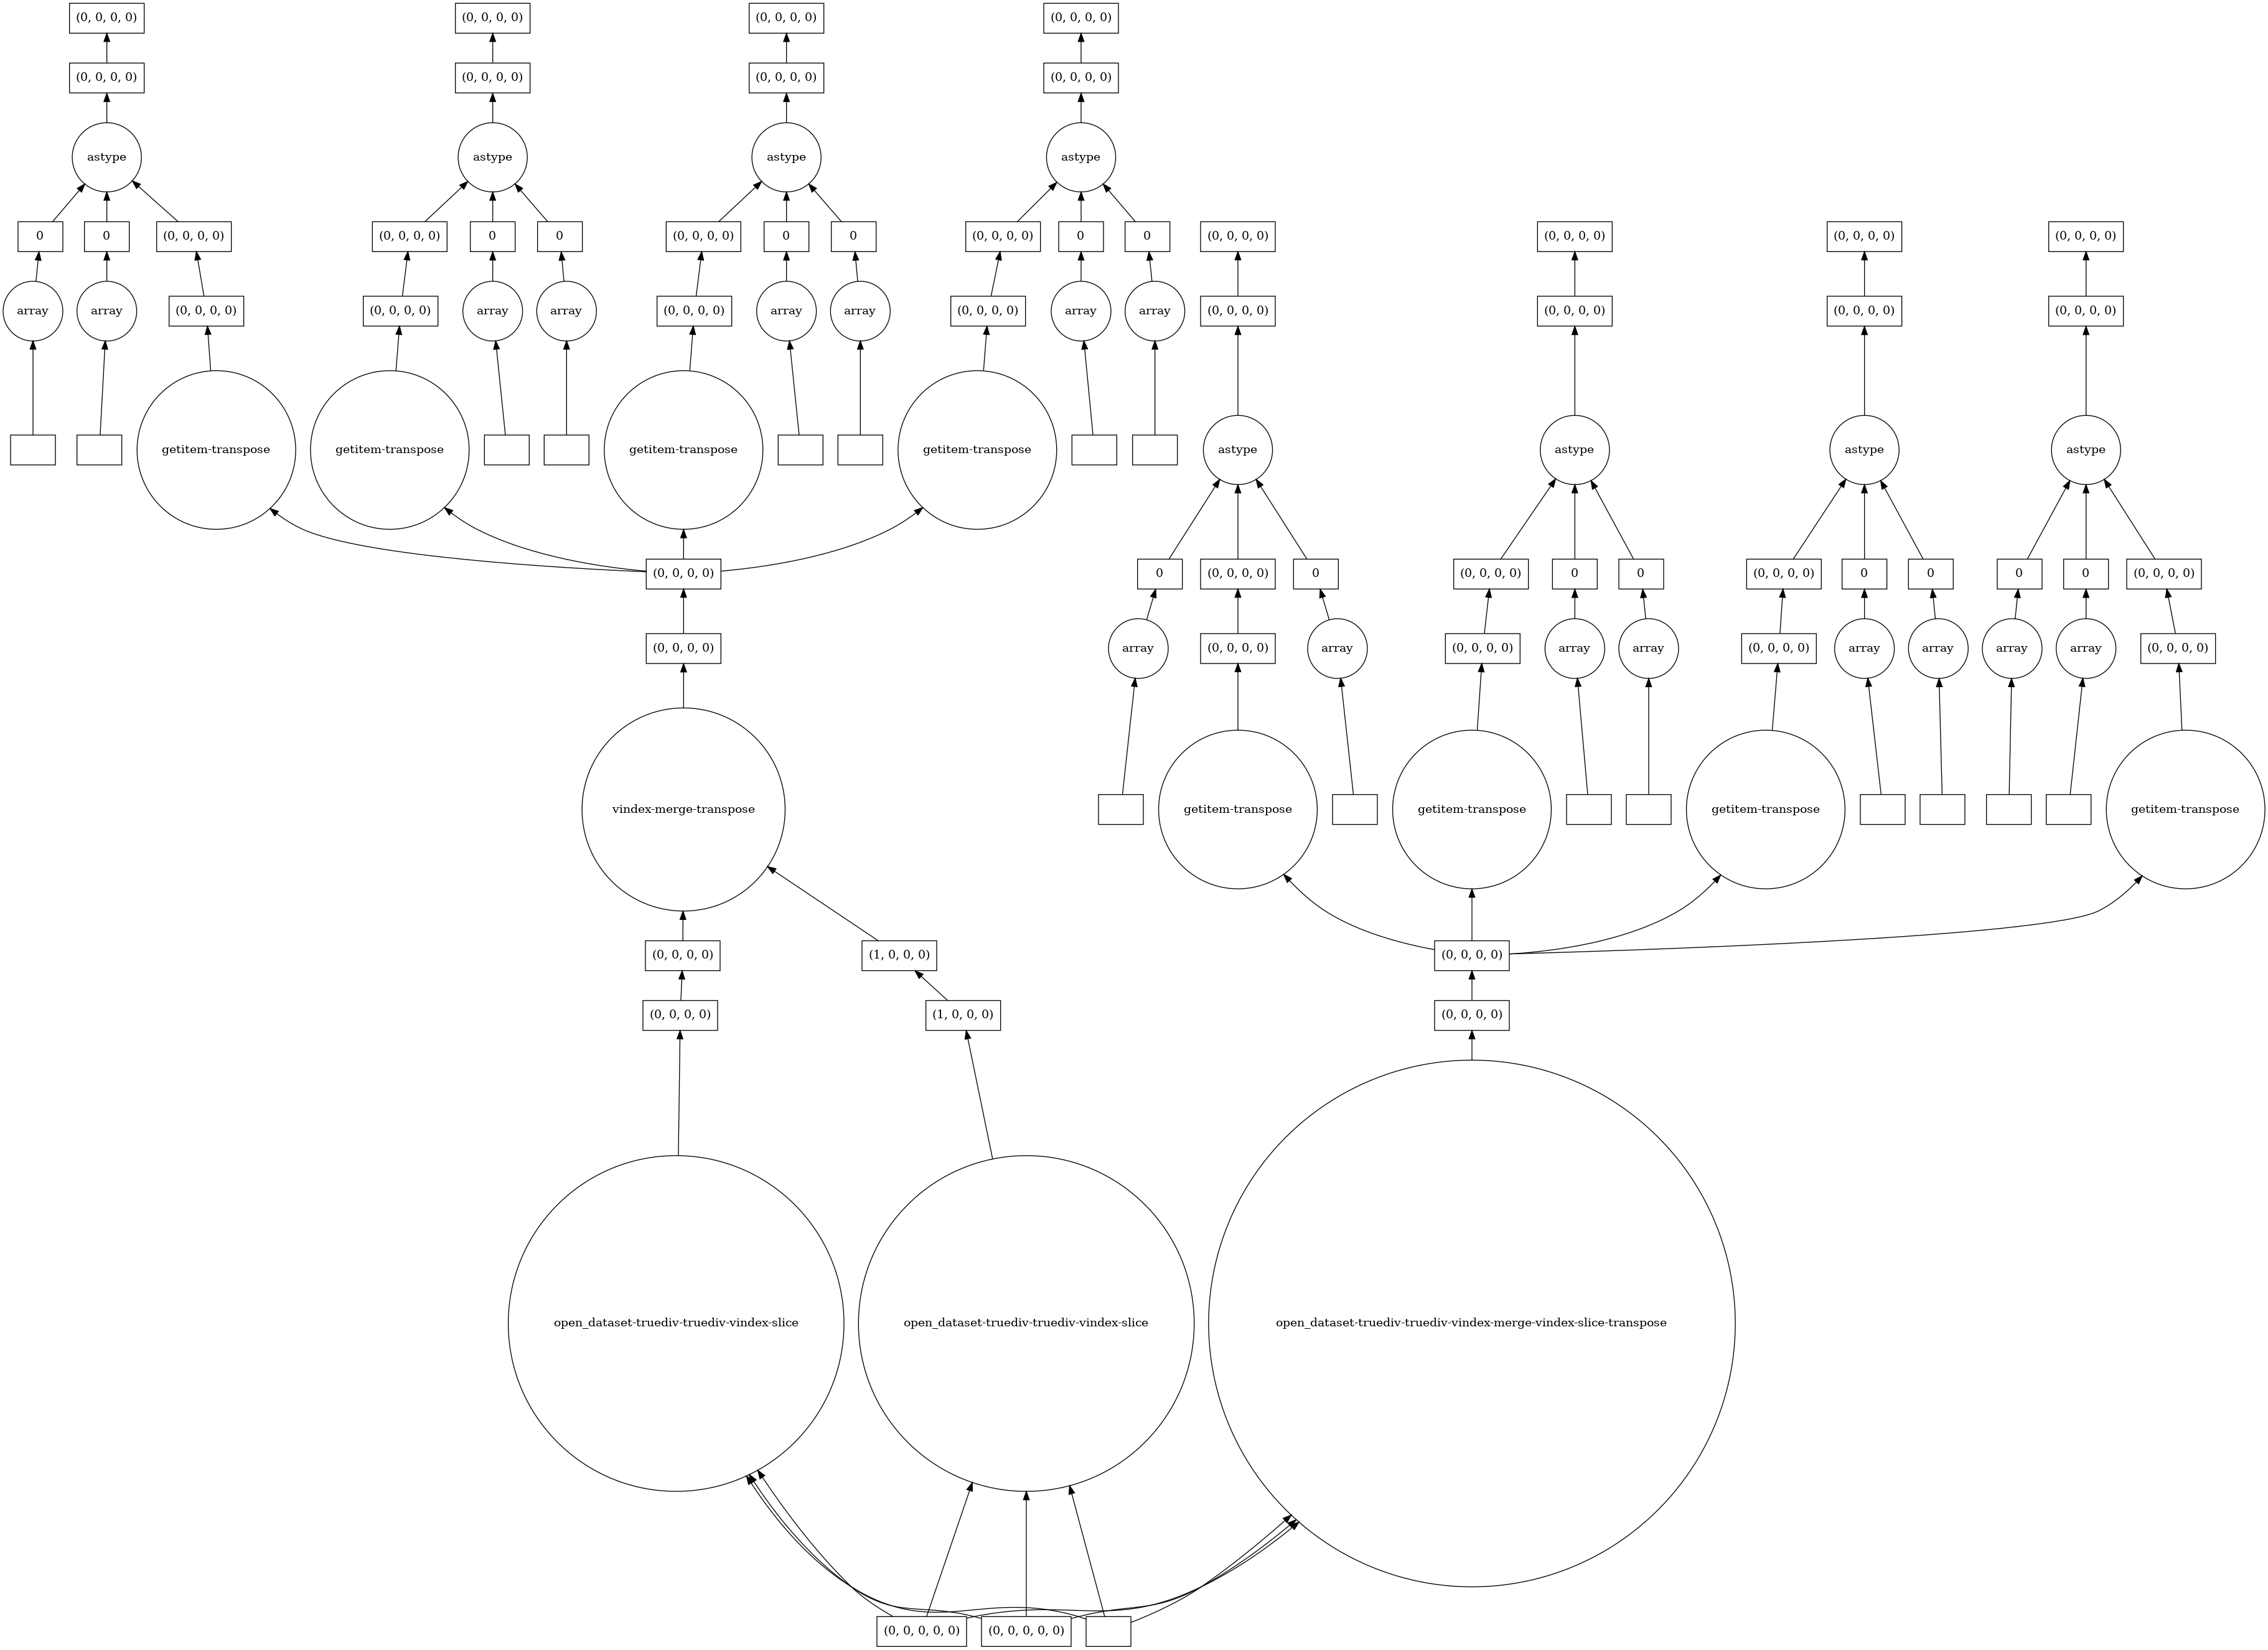

In [33]:
dask.visualize([example['nwp'] for example in batch], optimize_graph=True)

In [9]:
%%time
example = nwp_ds.get_example(
    x_meters_center=100000,
    y_meters_center=100000,
    t0_dt=pd.Timestamp('2018-06-16 10:05:00')
)

CPU times: user 44.8 ms, sys: 45 µs, total: 44.9 ms
Wall time: 40.7 ms


In [13]:
%%time
example = dask.compute(example)

In [14]:
example

({'nwp': <xarray.DataArray 'UKV' (variable: 10, target_time: 2, y: 2, x: 2)>
  array([[[[ 0.29181385,  0.25630957],
           [ 0.29181385,  0.25630957]],
  
          [[ 0.28148258,  0.24920596],
           [ 0.28148258,  0.24920596]]],
  
  
         [[[ 1.962355  ,  2.356827  ],
           [ 1.4180882 ,  1.3373365 ]],
  
          [[ 2.1018534 ,  2.5443726 ],
           [ 1.7037472 ,  1.6779066 ]]],
  
  
         [[[-0.24549344, -0.24549344],
           [-0.2454933 , -0.2454933 ]],
  
          [[-0.24549314, -0.24549314],
           [-0.24549301, -0.24549301]]],
  
  ...
  
         [[[ 0.33666694,  0.28161165],
           [ 0.902858  , -0.09434945]],
  
          [[ 0.34737796,  0.2681155 ],
           [ 0.80367273, -0.1290537 ]]],
  
  
         [[[ 0.46881846, -0.72057086],
           [ 0.70113164,  1.0198327 ]],
  
          [[ 0.45422584, -0.7571496 ],
           [ 0.59898376,  0.8277948 ]]],
  
  
         [[[-1.0012907 , -1.0012907 ],
           [-1.0012907 , -1.0012907 ]]